# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import mannwhitneyu as mw

# setting up important variables

In [3]:
# energy;concrete;resid_build_sale_price --> ;toxicity --> D;instanbul--> D; ppb --> D

In [4]:
dataset = "concrete"

In [5]:
def get_best_params(dataset):
    
    # reading the dataset
    df = pd.read_csv(f"gridlog/{dataset}_grid_search.csv").drop(columns = "Unnamed: 0")
    
    # getting the names of the columns with the test rmse and size for each split
    test_rmse_colnames = [col for col in df.columns if re.match("split[0-9]_test_rmse", col)]
    test_size_colnames = [col.replace("rmse", "size") for col in test_rmse_colnames]

    # calculating the median test rmse for each parameter combination
    df["median_test_rmse"] = df.apply(lambda x: np.abs(np.median([x[cn] for cn in test_rmse_colnames])), axis = 1)

    # calculating the median test size for each parameter combination
    df["median_test_size"] = df.apply(lambda x: np.abs(np.median([x[cn] for cn in test_size_colnames])), axis = 1)
    
    # obtaining the best parameter set based on rmse
    best_rmse = eval(re.sub("<(?:.+)>",df.sort_values(by = "median_test_rmse").iloc[0]["param_ms"], 
       df.sort_values(by = "median_test_rmse").iloc[0]["params"]))

    # obtaining the best parameter set based on size
    best_size = eval(re.sub("<(?:.+)>", df.sort_values(by = "median_test_size").iloc[0]["param_ms"], 
       df.sort_values(by = "median_test_size").iloc[0]["params"]))
    
    ########
    
    # INVALIDITY
    
    ########
    # discarding invalid combinations
    
    
    i = 1
    
    invalids = [["mul", False, True], ["sum", False, True]]
    
    while [best_rmse["operator"], best_rmse["sig"], best_rmse["two_trees"]] in invalids:
        best_rmse = eval(re.sub("<(?:.+)>",df.sort_values(by = "median_test_rmse").iloc[0]["param_ms"], 
       df.sort_values(by = "median_test_rmse").iloc[i]["params"]))
        
        i += 1
        
    i = 1
    
    while [best_size["operator"], best_size["sig"], best_size["two_trees"]] in invalids:
        best_size = eval(re.sub("<(?:.+)>",df.sort_values(by = "median_test_size").iloc[0]["param_ms"], 
       df.sort_values(by = "median_test_size").iloc[i]["params"]))
        
        i += 1
        
    
    return best_rmse, best_size, df

In [6]:
def find_first_significance(df, by_size=False):
    
    """
    
    No longer used since we will just present top 10 results
    
    """
    if by_size:
        for i in range(len(df)):
            if mw(df.sort_values(by = "median_test_size").iloc[0][size_cols].values.tolist(), 
                       df.sort_values(by = "median_test_size").iloc[i][size_cols].values.tolist())[-1] <= 0.05:
                return i
        return None
    else:
        for i in range(len(df)):
            if mw(df.sort_values(by = "median_test_rmse").iloc[0][rmse_cols].values.tolist(), 
                       df.sort_values(by = "median_test_rmse").iloc[i][rmse_cols].values.tolist())[-1] <= 0.05:
                return i
        return None

In [7]:
def get_slim_version(operator, sig, two_tree):
    if operator == "sum" and sig and two_tree:
        return "SLIM+SIG2"
    elif operator == "mul" and sig and two_tree:
        return "SLIM*SIG2"
    elif operator == "sum" and not sig and not two_tree:
        return"SLIM+ABS"
    elif operator == "mul" and not sig and not two_tree:
        return "SLIM*ABS"
    elif operator == "sum" and sig and not two_tree:
        return "SLIM+SIG1"
    elif operator == "mul" and sig and not two_tree:
        return "SLIM*SIG1"
    else:
        print("invalid slim configuration")

# analyzing the results

Single

In [8]:
dataset = "concrete"

In [9]:
rmse, size, df = get_best_params(dataset=dataset)

test_rmse_colnames = [col for col in df.columns if re.match("split[0-9]_test_rmse", col)]
test_rmse_colnames

['split0_test_rmse',
 'split1_test_rmse',
 'split2_test_rmse',
 'split3_test_rmse',
 'split4_test_rmse']

In [10]:
rmse

{'copy_parent': True,
 'max_depth': None,
 'ms': (0, 3),
 'operator': 'sum',
 'p_inflate': 0.9,
 'sig': True,
 'two_trees': False}

In [11]:
[col.replace("rmse", "size") for col in test_rmse_colnames]

['split0_test_size',
 'split1_test_size',
 'split2_test_size',
 'split3_test_size',
 'split4_test_size']

Multiple

In [12]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy_parent,param_max_depth,param_ms,param_operator,param_p_inflate,param_sig,...,split0_test_size,split1_test_size,split2_test_size,split3_test_size,split4_test_size,mean_test_size,std_test_size,rank_test_size,median_test_rmse,median_test_size
0,17.886454,0.713931,0.008999,0.002082,True,NaN,"(0, 0.01)",mul,0.1,False,...,-738.0,-534.0,-554.0,-537.0,-897.0,-652.0,144.342648,747,34.608093,554.0
1,53.017137,2.020076,0.049781,0.011252,True,NaN,"(0, 0.01)",mul,0.3,False,...,-2768.0,-2338.0,-3001.0,-2718.0,-2712.0,-2707.4,212.820676,1119,35.098480,2718.0
2,83.009459,2.076056,0.073684,0.006190,True,NaN,"(0, 0.01)",mul,0.5,False,...,-4402.0,-4697.0,-4715.0,-3880.0,-4211.0,-4381.0,313.609311,1152,34.611774,4402.0
3,113.736959,2.590327,0.116411,0.012388,True,NaN,"(0, 0.01)",mul,0.7,False,...,-6918.0,-5788.0,-6810.0,-6583.0,-6343.0,-6488.4,402.152508,1186,34.356186,6583.0
4,137.668831,1.448759,0.128076,0.013657,True,NaN,"(0, 0.01)",mul,0.9,False,...,-7879.0,-7734.0,-8490.0,-7780.0,-7815.0,-7939.6,279.242260,1199,34.089787,7815.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,39.990024,3.463794,0.008577,0.002999,False,100.0,"(0, 10)",sum,0.5,False,...,-385.0,-201.0,-341.0,-331.0,-403.0,-332.2,70.841796,578,7.794052,341.0
1196,58.548503,2.158602,0.017795,0.003473,False,100.0,"(0, 10)",sum,0.7,True,...,-1374.0,-1194.0,-1365.0,-1048.0,-1308.0,-1257.8,122.964060,959,8.145095,1308.0
1197,54.857380,1.805376,0.018152,0.008472,False,100.0,"(0, 10)",sum,0.7,False,...,-513.0,-583.0,-613.0,-457.0,-549.0,-543.0,54.464667,667,8.184869,549.0
1198,63.459479,0.611161,0.020362,0.003254,False,100.0,"(0, 10)",sum,0.9,True,...,-1335.0,-1410.0,-1407.0,-1276.0,-1293.0,-1344.2,55.912074,988,8.678095,1335.0


In [13]:
# energy;concrete;resid_build_sale_price --> ;toxicity --> D;instanbul--> D; ppb --> D

datasets = ["energy", "concrete", "resid_build_sale_price","toxicity","instanbul", "ppb"]

sizes = []
rmseses = []

# dataset = "ppb"

for data in datasets:
    rmse, size, df = get_best_params(dataset=data)
    
    # fixing the ms variable
    rmse['ms'] = int(str(rmse['ms']).split(',')[-1].replace(")", ""))
    size['ms'] = int(str(size['ms']).split(',')[-1].replace(")", ""))
    
    # adding the slim variable:
    rmse['slim_version'] = get_slim_version(rmse['operator'], rmse['sig'], rmse['two_trees'])
    size['slim_version'] = get_slim_version(size['operator'], size['sig'], size['two_trees'])
    
    s = pd.DataFrame([size])
    
    s['winning_by'] = s['copy_parent'].map(lambda x: "size")
    s['ms'] = s.ms.map(lambda x : str(x))
    sizes.append(s)
    
    r = pd.DataFrame([rmse])
    r['winning_by'] = r['copy_parent'].map(lambda x: "rmse")
    r['ms'] = r.ms.map(lambda x : str(x))
    
    rmseses.append(r)
    
df = pd.concat(sizes + rmseses, axis=0)

In [14]:
rmse

{'copy_parent': True,
 'max_depth': 50,
 'ms': 3,
 'operator': 'sum',
 'p_inflate': 0.5,
 'sig': False,
 'two_trees': False,
 'slim_version': 'SLIM+ABS'}

In [15]:
df

,copy_parent,max_depth,ms,operator,p_inflate,sig,two_trees,slim_version,winning_by
0,True,100,3,mul,0.1,True,False,SLIM*SIG1,size
0,True,None,10,mul,0.1,True,False,SLIM*SIG1,size
0,True,100,10,mul,0.1,True,False,SLIM*SIG1,size
0,False,50,10,mul,0.1,True,False,SLIM*SIG1,size
0,True,100,10,sum,0.1,False,False,SLIM+ABS,size
0,True,17,10,mul,0.1,True,False,SLIM*SIG1,size
0,False,17,1,mul,0.3,False,False,SLIM*ABS,rmse
0,True,None,3,sum,0.9,True,False,SLIM+SIG1,rmse
0,False,None,1,mul,0.7,False,False,SLIM*ABS,rmse
0,False,None,10,mul,0.9,True,False,SLIM*SIG1,rmse


# Visualizations

## Mul vs Sum

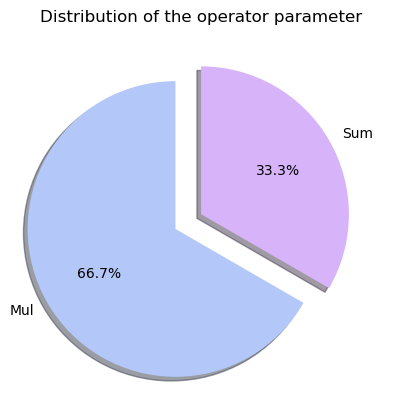

In [16]:
plt.pie([len(df[df.operator == "mul"]),df.shape[0]-len(df[df.operator == "mul"])], labels=["Mul","Sum"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors =  ["#B3C7F9", "#D7B3F9"]
)
plt.title("Distribution of the operator parameter")
plt.show()


### operator rmse vs size

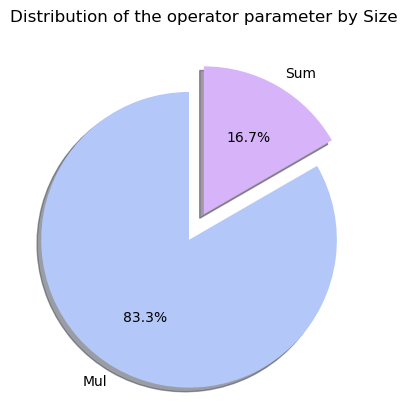

In [17]:
temp = df[df.winning_by=="size"]

plt.pie([len(temp[temp.operator == "mul"]),temp.shape[0]-len(temp[temp.operator == "mul"])], labels=["Mul","Sum"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors =  ["#B3C7F9", "#D7B3F9"]
)
plt.title("Distribution of the operator parameter by Size")
plt.show()

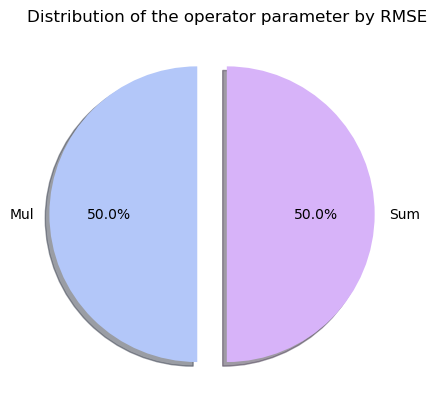

In [18]:
temp = df[df.winning_by=="rmse"]
plt.pie([len(temp[temp.operator == "mul"]),temp.shape[0]-len(temp[temp.operator == "mul"])], labels=["Mul","Sum"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors =  ["#B3C7F9", "#D7B3F9"]
)
plt.title("Distribution of the operator parameter by RMSE")
plt.show()

## copy_parent

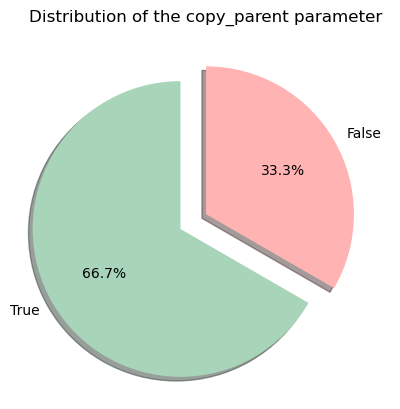

In [19]:
plt.pie([len(df[df.copy_parent]),df.shape[0]-len(df[df.copy_parent])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors=["#A8D5BA", "#FFB3B3"])
plt.title("Distribution of the copy_parent parameter")
plt.show()


### copy parent size vs rmse

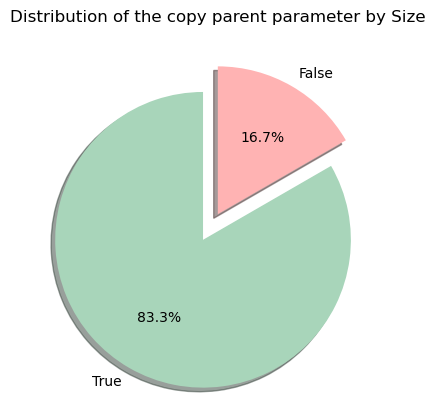

In [20]:
temp = df[df.winning_by=="size"]

plt.pie([len(temp[temp.copy_parent]),temp.shape[0]-len(temp[temp.copy_parent])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors = ["#A8D5BA", "#FFB3B3"]
)
plt.title("Distribution of the copy parent parameter by Size")
plt.show()

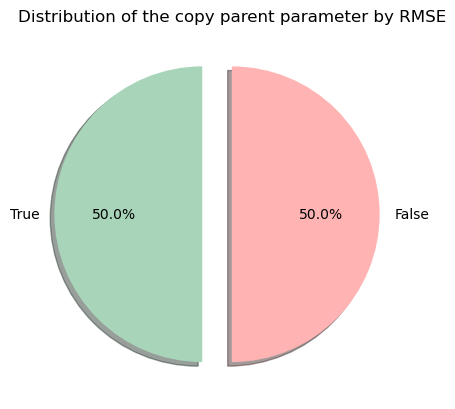

In [21]:
temp = df[df.winning_by=="rmse"]

plt.pie([len(temp[temp.copy_parent]),temp.shape[0]-len(temp[temp.copy_parent])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors = ["#A8D5BA", "#FFB3B3"]
)
plt.title("Distribution of the copy parent parameter by RMSE")
plt.show()

## Two trees

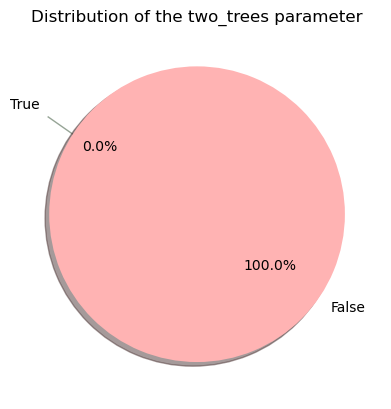

In [22]:
plt.pie([len(df[df.two_trees]),df.shape[0]-len(df[df.two_trees])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=145,explode = (0.2,0.0),colors=["palegreen","#FFB3B3"])
plt.title("Distribution of the two_trees parameter")
plt.show()

# Sig

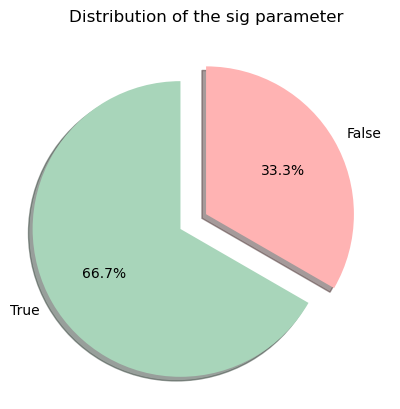

In [23]:
plt.pie([len(df[df.sig]),df.shape[0]-len(df[df.sig])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors = ["#A8D5BA", "#FFB3B3"])
plt.title("Distribution of the sig parameter")
plt.show()

### sig rmse vs size

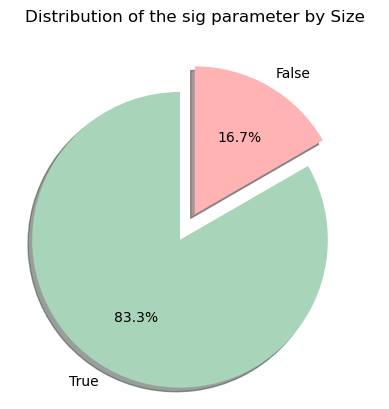

In [24]:
temp = df[df.winning_by=="size"]

plt.pie([len(temp[temp.sig]),temp.shape[0]-len(temp[temp.sig])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors = ["#A8D5BA", "#FFB3B3"]
)
plt.title("Distribution of the sig parameter by Size")
plt.show()

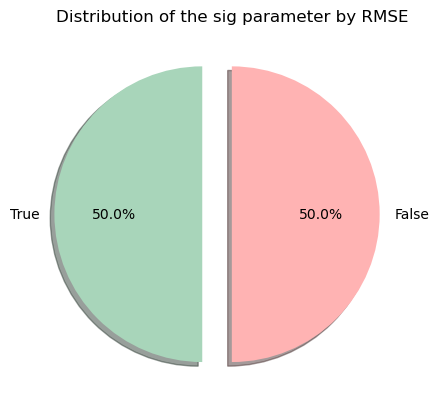

In [25]:
temp = df[df.winning_by=="rmse"]

plt.pie([len(temp[temp.sig]),temp.shape[0]-len(temp[temp.sig])], labels=["True","False"], autopct='%1.1f%%',
        shadow=True, startangle=90,explode = (0.2,0.0),colors = ["#A8D5BA", "#FFB3B3"]
)
plt.title("Distribution of the sig parameter by RMSE")
plt.show()

## ms

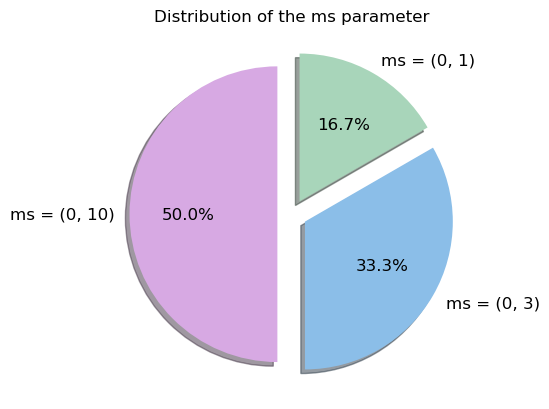

In [26]:
labels = [f'ms = (0, {val})' for val in list(df['ms'].value_counts().index)]
plt.pie(
    [val for val in df['ms'].value_counts()], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1, 0.1), 
    colors=["#D7A9E3FF", "#8BBEE8FF", "#A8D5BAFF"], 
    textprops={'fontsize': 12}
)

plt.title("Distribution of the ms parameter")

plt.show()


#### ms size vs. rmse

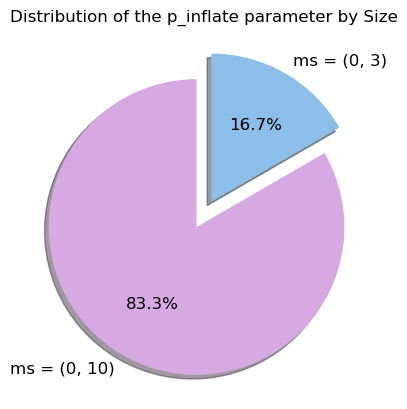

In [27]:
# SIZE
temp = df[df.winning_by=="size"]
# Get the labels and replace None with the string "None"
labels = [f'ms = (0, {val})' for val in list(temp['ms'].value_counts().index)]
# Plot the pie chart
plt.pie(
    [val for val in temp['ms'].value_counts(dropna=False)], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1),  # Adjust explode to match the number of labels if necessary
    colors = ["#D7A9E3FF","#8BBEE8FF"],

    textprops={'fontsize': 12}
)

plt.title("Distribution of the p_inflate parameter by Size")
plt.show()

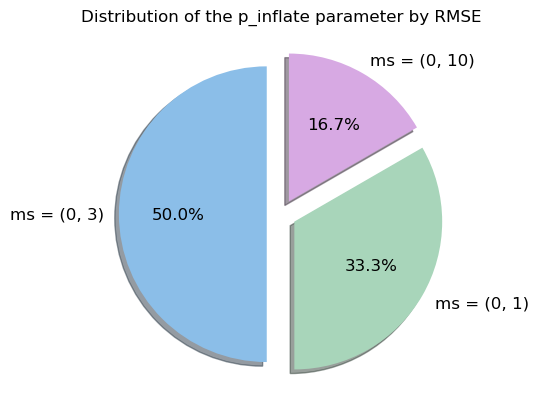

In [28]:

temp = df[df.winning_by=="rmse"]
# Get the labels and replace None with the string "None"
labels = [f'ms = (0, {val})' for val in list(temp['ms'].value_counts().index)]
# Plot the pie chart
plt.pie(
    [val for val in temp['ms'].value_counts(dropna=False)], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1, 0.1),  # Adjust explode to match the number of labels if necessary
    colors = ["#8BBEE8FF", "#A8D5BAFF" ,"#D7A9E3FF"],

    textprops={'fontsize': 12}
)

plt.title("Distribution of the p_inflate parameter by RMSE")
plt.show()

## p_inflate

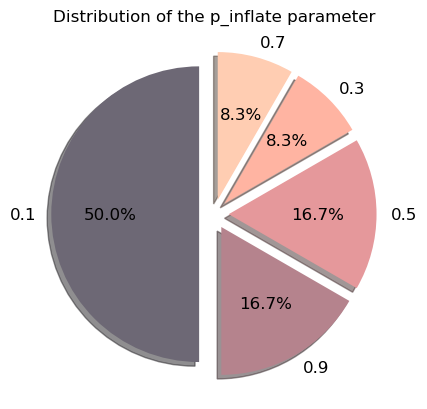

In [29]:
labels = list(df['p_inflate'].value_counts().index)
plt.pie(
    [val for val in df['p_inflate'].value_counts()], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1, 0.1, 0.1, 0.1), 
    colors = ["#6D6875", "#B5838D", "#E5989B", "#FFB4A2", "#FFCDB2"]
, 
    textprops={'fontsize': 12}
)

plt.title("Distribution of the p_inflate parameter")

plt.show()


#### p_inflate size vs. rmse

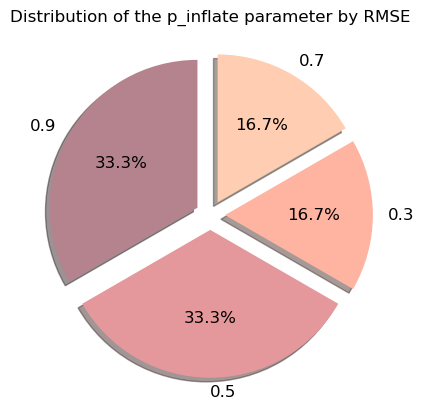

In [30]:
# RMSE
temp = df[df.winning_by=="rmse"]
# Get the labels and replace None with the string "None"
labels = [str(label) if label is not None else "None" for label in temp['p_inflate'].value_counts(dropna=False).index]

# Plot the pie chart
plt.pie(
    [val for val in temp['p_inflate'].value_counts(dropna=False)], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1, 0.1, 0.1),  # Adjust explode to match the number of labels if necessary
    colors = ["#B5838D", "#E5989B", "#FFB4A2", "#FFCDB2"],

    textprops={'fontsize': 12}
)

plt.title("Distribution of the p_inflate parameter by RMSE")
plt.show()

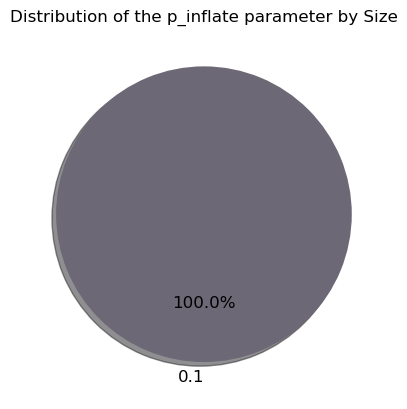

In [31]:
# Size
temp = df[df.winning_by=="size"]
# Get the labels and replace None with the string "None"
labels = [str(label) if label is not None else "None" for label in temp['p_inflate'].value_counts(dropna=False).index]

# Plot the pie chart
plt.pie(
    [val for val in temp['p_inflate'].value_counts(dropna=False)], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    #explode=(0.1),  # Adjust explode to match the number of labels if necessary
    colors = ["#6D6875"],

    textprops={'fontsize': 12}
)

plt.title("Distribution of the p_inflate parameter by Size")
plt.show()

## max_depth

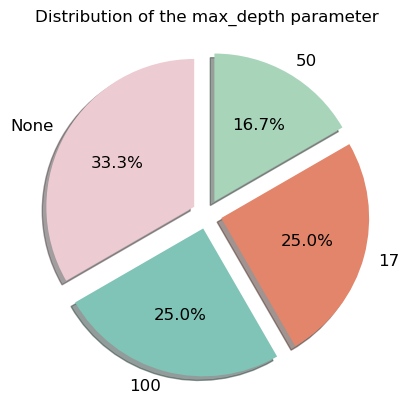

In [32]:
# Get the labels and replace None with the string "None"
labels = [str(label) if label is not None else "None" for label in df['max_depth'].value_counts(dropna=False).index]

# Plot the pie chart
plt.pie(
    [val for val in df['max_depth'].value_counts(dropna=False)], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1, 0.1, 0.1),  # Adjust explode to match the number of labels if necessary
    colors=["#EDCBD2", "#80C4B7", "#E3856B", "#A8D5BAFF"],  # Add an extra color if needed
    textprops={'fontsize': 12}
)

plt.title("Distribution of the max_depth parameter")
plt.show()



#### max_depth size vs rmse

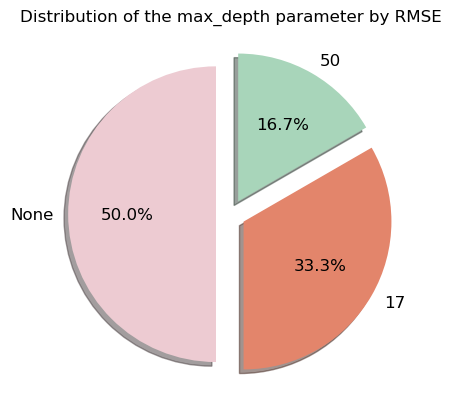

In [33]:
# RMSE
temp = df[df.winning_by=="rmse"]
# Get the labels and replace None with the string "None"
labels = [str(label) if label is not None else "None" for label in temp['max_depth'].value_counts(dropna=False).index]

# Plot the pie chart
plt.pie(
    [val for val in temp['max_depth'].value_counts(dropna=False)], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1, 0.1),  # Adjust explode to match the number of labels if necessary
    colors = [ "#EDCBD2", "#E3856B", "#A8D5BAFF"],
    textprops={'fontsize': 12}
)

plt.title("Distribution of the max_depth parameter by RMSE")
plt.show()

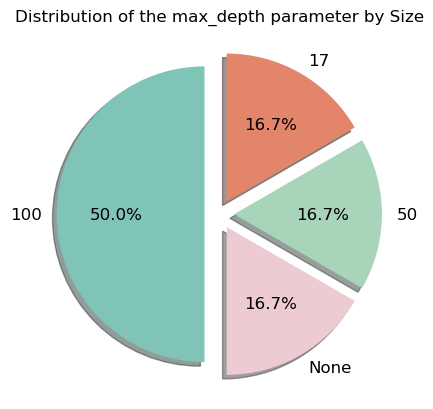

In [34]:
# SIZE
temp = df[df.winning_by=="size"]
# Get the labels and replace None with the string "None"
labels = [str(label) if label is not None else "None" for label in temp['max_depth'].value_counts(dropna=False).index]

# Plot the pie chart
plt.pie(
    [val for val in temp['max_depth'].value_counts(dropna=False)], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1, 0.1, 0.1),  # Adjust explode to match the number of labels if necessary
    colors = ["#80C4B7","#EDCBD2", "#A8D5BAFF" ,"#E3856B"],
    textprops={'fontsize': 12}
)

plt.title("Distribution of the max_depth parameter by Size")
plt.show()

## Slim version:


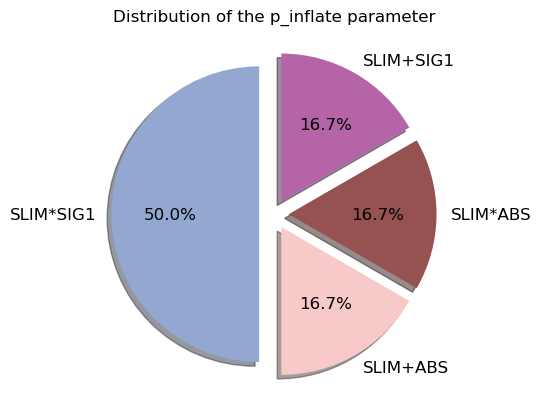

In [48]:
labels = list(df['slim_version'].value_counts().index)
plt.pie(
    [val for val in df['slim_version'].value_counts()], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1, 0.1, 0.1), 
    colors = ['#92A8D1', '#F7CAC9','#955251', '#B565A7']
, 
    textprops={'fontsize': 12}
)

plt.title("Distribution of the p_inflate parameter")

plt.show()


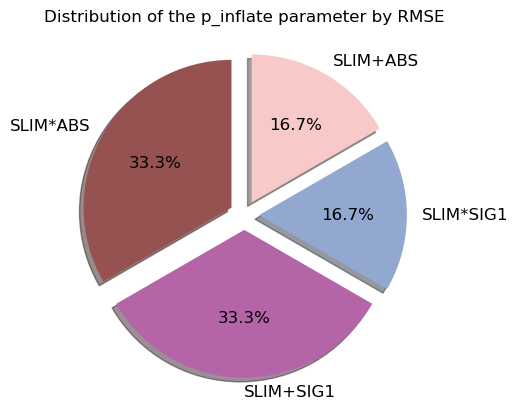

In [63]:
# RMSE
temp = df[df.winning_by=="rmse"]
# Get the labels and replace None with the string "None"
labels = [str(label) if label is not None else "None" for label in temp['slim_version'].value_counts(dropna=False).index]

# Plot the pie chart
plt.pie(
    [val for val in temp['slim_version'].value_counts(dropna=False)], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1, 0.1, 0.1),  # Adjust explode to match the number of labels if necessary
    colors = ['#955251','#B565A7','#92A8D1' ,'#F7CAC9'],

    textprops={'fontsize': 12}
)

plt.title("Distribution of the p_inflate parameter by RMSE")
plt.show()

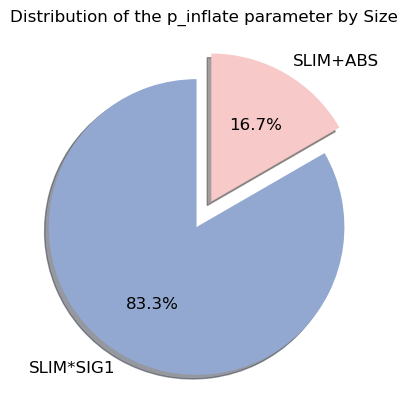

In [58]:
# RMSE
temp = df[df.winning_by=="size"]
# Get the labels and replace None with the string "None"
labels = [str(label) if label is not None else "None" for label in temp['slim_version'].value_counts(dropna=False).index]

# Plot the pie chart
plt.pie(
    [val for val in temp['slim_version'].value_counts(dropna=False)], 
    labels=labels, 
    autopct='%1.1f%%',
    shadow=True, 
    startangle=90, 
    explode=(0.1, 0.1),  # Adjust explode to match the number of labels if necessary
    colors = ['#92A8D1', '#F7CAC9','#955251', '#B565A7'],

    textprops={'fontsize': 12}
)

plt.title("Distribution of the p_inflate parameter by Size")
plt.show()

## Overview

## Size vs. RMSE

### copy parent

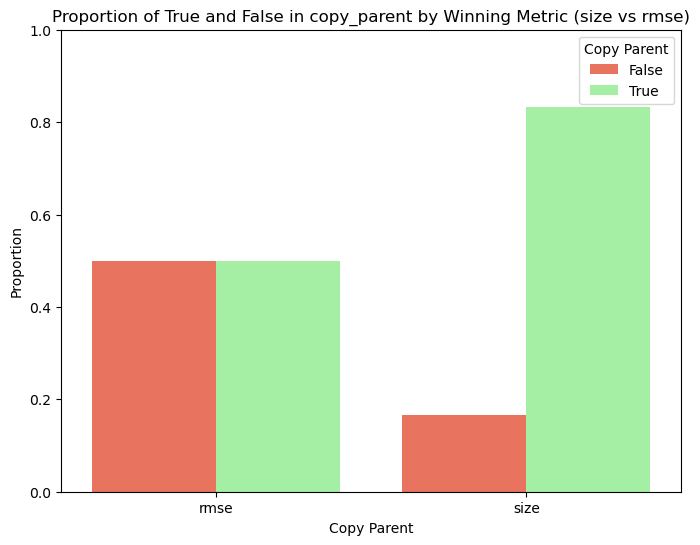

In [37]:
df['copy_parent'] = df['copy_parent'].astype(str) 

count_df = df.groupby(['winning_by', 'copy_parent']).size()

proportion_df = count_df / count_df.groupby(level=0).sum()
proportion_df = proportion_df.reset_index(name='proportion')  

custom_palette = {
    'True': 'palegreen',
    'False': 'tomato'
}

# plotting the proportions with custom colors
plt.figure(figsize=(8, 6))
ax = sb.barplot(data=proportion_df, x='winning_by', y='proportion', hue='copy_parent', palette=custom_palette)
plt.title('Proportion of True and False in copy_parent by Winning Metric (size vs rmse)')
plt.xlabel('Copy Parent')
plt.ylabel('Proportion')
plt.legend(title='Copy Parent')
plt.ylim(0, 1)  # setting y-axis from 0 to 1 for proportions
plt.show()


### two trees

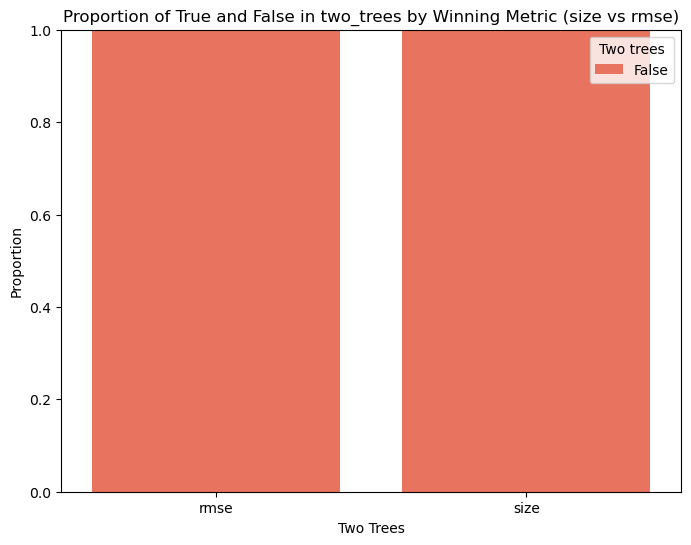

In [38]:
df['two_trees'] = df['two_trees'].astype(str) 

count_df = df.groupby(['winning_by', 'two_trees']).size()

proportion_df = count_df / count_df.groupby(level=0).sum()
proportion_df = proportion_df.reset_index(name='proportion')  

custom_palette = {
    'True': 'palegreen',
    'False': 'tomato'
}

# plotting the proportions with custom colors
plt.figure(figsize=(8, 6))
ax = sb.barplot(data=proportion_df, x='winning_by', y='proportion', hue='two_trees', palette=custom_palette)
plt.title('Proportion of True and False in two_trees by Winning Metric (size vs rmse)')
plt.xlabel('Two Trees')
plt.ylabel('Proportion')
plt.legend(title='Two trees')
plt.ylim(0, 1)  # setting y-axis from 0 to 1 for proportions
plt.show()


### sig

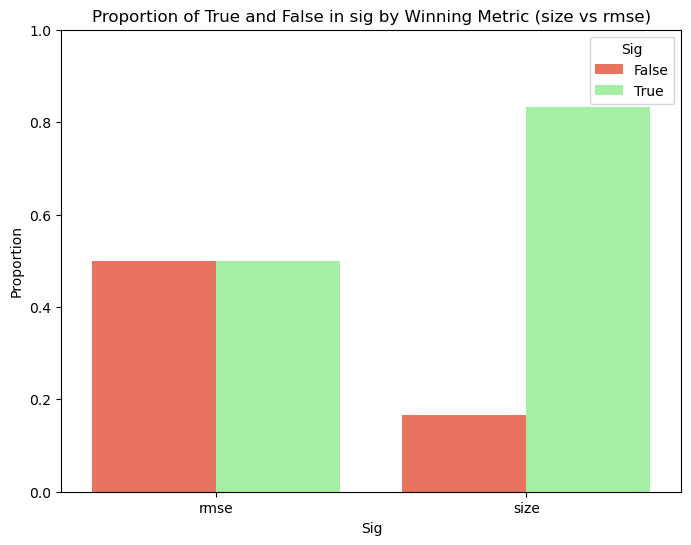

In [39]:
df['sig'] = df['sig'].astype(str) 

count_df = df.groupby(['winning_by', 'sig']).size()

proportion_df = count_df / count_df.groupby(level=0).sum()
proportion_df = proportion_df.reset_index(name='proportion')  

custom_palette = {
    'True': 'palegreen',
    'False': 'tomato'
}

# plotting the proportions with custom colors
plt.figure(figsize=(8, 6))
ax = sb.barplot(data=proportion_df, x='winning_by', y='proportion', hue='sig', palette=custom_palette)
plt.title('Proportion of True and False in sig by Winning Metric (size vs rmse)')
plt.xlabel('Sig')
plt.ylabel('Proportion')
plt.legend(title='Sig')
plt.ylim(0, 1)  # setting y-axis from 0 to 1 for proportions
plt.show()

Notes and extras

In [40]:
size_cols = [col for col in df.columns if "split" in col and "rmse" not in col]
rmse_cols = [col for col in df.columns if "split" in col and "rmse" in col]

In [41]:
rmse


{'copy_parent': True,
 'max_depth': 50,
 'ms': 3,
 'operator': 'sum',
 'p_inflate': 0.5,
 'sig': False,
 'two_trees': False,
 'slim_version': 'SLIM+ABS'}

In [42]:
# ensuring value column is converted to string
proportion_data['Value'] = proportion_data['Value'].astype(str)

# defining a custom color palette
custom_palette = {
    'True': 'palegreen',
    'False': 'tomato',
    'mul': 'lightblue',
    'sum': 'plum'
}

# plotting with the custom color palette
plt.figure(figsize=(10, 6))
sb.barplot(data=proportion_data, x='Variable', y='Proportion', hue='Value', palette=custom_palette)
plt.title('Proportion of relevant parameters obtained in the best models of the Grid-Search')
plt.xlabel('Variable Name')
plt.ylabel('Proportion')
plt.legend(title='Value')
plt.ylim(0, 1)  # ensures y-axis is from 0 to 1 for proportions
plt.show()


NameError: name 'proportion_data' is not defined